Para esta atividade iremos usar um conjunto de dados sobre preços de imóveis. O conjunto original pode ser encontrado no [kaggle](https://www.kaggle.com/datasets/gunhee/koreahousedata). Os dados que usaremos foram alterados para facilitar as análises.

# Regressão Linear Simples

## Atividade 1: Importe os dados e verifique se há dados faltantes.

In [6]:
import pandas as pd

#retirar warnings
import warnings
warnings.filterwarnings('ignore')


In [7]:
# Carregar os dados
data = pd.read_excel("apartamentos.xlsx")

data.head()

,preco,ano_construcao,ano_Venda,m2,andar,tipo_Aquecimento,tempo_ate_onibus,tempo_ate_metro,qtde_elevadores,qtde_escritorios_publicos_perto,qtde_hospitais_perto,qtde_lojas_departamento_perto,qtde_shoppings_perto,qtde_estacionamentos_perto,qtde_escolas_fundamental1_perto,qtde_escolas_fundamental2_perto,qtde_escolas_medio_perto,qtde_universidades_perto
0,849552,2006,2007,75.623042,3,individual,5min~10min,10min~15min,0,2,1,1,1,0,3,2,2,2
1,307962,1985,2007,54.534061,8,individual,0~5min,5min~10min,2,5,1,2,1,1,2,1,1,0
2,292032,1985,2007,54.534061,6,individual,0~5min,5min~10min,2,5,1,2,1,1,2,1,1,0
3,2283180,2006,2007,191.008568,8,individual,0~5min,0-5min,11,1,1,0,1,0,2,2,1,2
4,1327428,1993,2007,163.602183,3,individual,0~5min,15min~20min,20,6,2,0,1,0,4,3,5,5


In [8]:
# Verificar se existem dados faltantes
missing_data = data.isnull().sum()

missing_data

preco                              0
ano_construcao                     0
ano_Venda                          0
m2                                 0
andar                              0
tipo_Aquecimento                   0
tempo_ate_onibus                   0
tempo_ate_metro                    0
qtde_elevadores                    0
qtde_escritorios_publicos_perto    0
qtde_hospitais_perto               0
qtde_lojas_departamento_perto      0
qtde_shoppings_perto               0
qtde_estacionamentos_perto         0
qtde_escolas_fundamental1_perto    0
qtde_escolas_fundamental2_perto    0
qtde_escolas_medio_perto           0
qtde_universidades_perto           0
dtype: int64

## Atividade 2: Selecione apenas as variáveis `preco` e `m2`, aplique o logaritmo natural na variável `m2` e verifique a correlação entre as variáveis.

In [9]:
import numpy as np

# Selecionar apenas as colunas 'preco' e 'm2'
data_selected = data[['preco', 'm2']]

# Aplicar o logaritmo natural na variável 'm2'
data_selected['m2'] = np.log(data_selected['m2'])

# Calcular a correlação entre as variáveis
correlation = data_selected.corr()

correlation

,preco,m2
preco,1.000000,0.706048
m2,0.706048,1.000000


In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

## Atividade 3: Crie um modelo de regressão linear simples e encontre os coeficientes do modelo.

In [10]:
# importando statsmodels
import statsmodels.api as sm

# separando as variáveis X e y
X = data_selected['m2']
y = data_selected['preco']

# adicionando o termo constante ao modelo
X = sm.add_constant(X)

# estimando o modelo de regressão linear
modelo1 = sm.OLS(y, X).fit()

# obtendo estatísticas sobre o modelo
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     5854.
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:35:44   Log-Likelihood:                -85068.
No. Observations:                5891   AIC:                         1.701e+05
Df Residuals:                    5889   BIC:                         1.702e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.37e+06   6.17e+04    -54.642      0.0

In [ ]:
# seu código

## Atividade 4: Verifique os pressupostos da regressão linear.

In [11]:
# prevendo valores para X
y_pred1 = modelo1.predict(X)

# calculando os resíduos
res1 = y - y_pred1

Linearidade

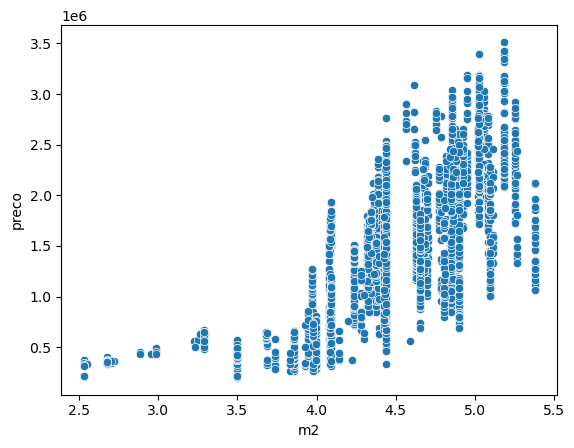

In [13]:
# criando gráfico de dispersão
import seaborn as sns

sns.scatterplot(data=data_selected, x='m2', y='preco');

Homocedasticidade

Vamos checar a homocedasticidade com um teste de hipótese: Goldfeld Quandt. Este teste pode ser realizado importando-se a função `statsmodels.stats.api.het_goldfeldquandt()`.

Neste teste, a hipótese nula é de que há homocedasticidade.

In [14]:
from statsmodels.stats.api import het_goldfeldquandt

stat, p_valor, _ = het_goldfeldquandt(res1, X)
p_valor

3.4232536086861035e-22

Há heterocedasticidade pq o p-valor é < 0,05

Normalidade dos Resíduos

Vamos checar a normalidadde dos resíduos usando o teste de hipóteses de Shapiro-Wilk. Neste caso, a hipótese nula é que a amostra segue distribuição normal. Podemos realizar este teste importando a função `scipy.stats.shapiro()`.

In [15]:
from scipy.stats import shapiro

stat, p_valor = shapiro(res1)
p_valor

7.838917594454599e-26

Como o p valor é menor que 0.05, podemos rejeitar a hipótese nula. Isto é, temos evidência de que os resíduos não seguem uma distribuição normal.

Isto indica que nosso modelo não satisfaz todos os pressupostos que deveria satisfazer. 

Muito importante! Não deveríamos usar este modelo para nenhum tipo de análise ou previsão.

Autocorrelação dos Resíduos

Para checar se há autocorrelação entre os resíduos vamos usar o teste de hipótese de Durbin Watson. Ele pode ser importado do `statsmodels` com a sintaxe `statsmodels.stats.stattolls.durbin_watons()`.

In [16]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(res1)

0.7433704819691179

Para decidirmor se há ou não autocorrelação dos resíduos, devemos observar o valor do teste. Valores entre 1.5 e 2.5 indicam que não há autocorrelação, valores fora dessa faixa indicam que há autocorrelação.

Multicolinearidade



Não é preciso checar a multicolinearidade, pois só temos uma variável preditora.

# Regressão Linear Múltipla

## Atividade 5: Crie um modelo de regressão linear múltipla.

Para facilitar o trabalho, vamos deixar um pré processamento pronto.

In [17]:
# importando os dados
df = pd.read_excel('apartamentos.xlsx')
df.head()

,preco,ano_construcao,ano_Venda,m2,andar,tipo_Aquecimento,tempo_ate_onibus,tempo_ate_metro,qtde_elevadores,qtde_escritorios_publicos_perto,qtde_hospitais_perto,qtde_lojas_departamento_perto,qtde_shoppings_perto,qtde_estacionamentos_perto,qtde_escolas_fundamental1_perto,qtde_escolas_fundamental2_perto,qtde_escolas_medio_perto,qtde_universidades_perto
0,849552,2006,2007,75.623042,3,individual,5min~10min,10min~15min,0,2,1,1,1,0,3,2,2,2
1,307962,1985,2007,54.534061,8,individual,0~5min,5min~10min,2,5,1,2,1,1,2,1,1,0
2,292032,1985,2007,54.534061,6,individual,0~5min,5min~10min,2,5,1,2,1,1,2,1,1,0
3,2283180,2006,2007,191.008568,8,individual,0~5min,0-5min,11,1,1,0,1,0,2,2,1,2
4,1327428,1993,2007,163.602183,3,individual,0~5min,15min~20min,20,6,2,0,1,0,4,3,5,5


In [18]:
# Vamos condensar algumas variáveis em uma única
df['qtde_servicos'] = df['qtde_hospitais_perto'] + \
                      df['qtde_lojas_departamento_perto'] + \
                      df['qtde_escritorios_publicos_perto'] + \
                      df['qtde_escolas_fundamental1_perto'] + \
                      df['qtde_escolas_fundamental2_perto'] + \
                      df['qtde_escolas_medio_perto'] + \
                      df['qtde_universidades_perto']

# excluindo as variáveis originais do DataFrame
df.drop(['qtde_hospitais_perto','qtde_lojas_departamento_perto',
         'qtde_escritorios_publicos_perto','qtde_escolas_fundamental1_perto',
         'qtde_escolas_fundamental2_perto','qtde_escolas_medio_perto',
         'qtde_universidades_perto'],
        axis=1, inplace=True)

In [19]:
# criando nova variável
df['qtde_conveniencia'] = df['qtde_shoppings_perto'] + df['qtde_estacionamentos_perto']

# excluindo variáveis do DataFrame
df.drop(['qtde_shoppings_perto','qtde_estacionamentos_perto'],
        axis=1, inplace=True)

df.head()

,preco,ano_construcao,ano_Venda,m2,andar,tipo_Aquecimento,tempo_ate_onibus,tempo_ate_metro,qtde_elevadores,qtde_servicos,qtde_conveniencia
0,849552,2006,2007,75.623042,3,individual,5min~10min,10min~15min,0,13,1
1,307962,1985,2007,54.534061,8,individual,0~5min,5min~10min,2,12,2
2,292032,1985,2007,54.534061,6,individual,0~5min,5min~10min,2,12,2
3,2283180,2006,2007,191.008568,8,individual,0~5min,0-5min,11,9,1
4,1327428,1993,2007,163.602183,3,individual,0~5min,15min~20min,20,25,1


In [20]:
# aplicando One Hot Encoding à variável tipo_Aquecimento
df_aux = pd.get_dummies(df['tipo_Aquecimento'], prefix='tipo_Aquecimento')
df = pd.concat([df, df_aux], axis=1)
df.drop(['tipo_Aquecimento', 'tipo_Aquecimento_central'], axis=1, inplace=True)

In [21]:
# aplicando One Hot Encoding à variável tempo_ate_onibus
df_aux = pd.get_dummies(df['tempo_ate_onibus'], prefix='tempo_ate_onibus')
df = pd.concat([df, df_aux], axis=1)
df.drop(['tempo_ate_onibus', 'tempo_ate_onibus_10min~15min'], axis=1, inplace=True)

In [22]:
# aplicando One Hot Encoding à variável tempo_ate_metro
df_aux = pd.get_dummies(df['tempo_ate_metro'], prefix='tempo_ate_metro')
df = pd.concat([df, df_aux], axis=1)
df.drop(['tempo_ate_metro', 'tempo_ate_metro_no_bus_stop_nearby'], axis=1, inplace=True)
df.head()

,preco,ano_construcao,ano_Venda,m2,andar,qtde_elevadores,qtde_servicos,qtde_conveniencia,tipo_Aquecimento_individual,tempo_ate_onibus_0~5min,tempo_ate_onibus_5min~10min,tempo_ate_metro_0-5min,tempo_ate_metro_10min~15min,tempo_ate_metro_15min~20min,tempo_ate_metro_5min~10min
0,849552,2006,2007,75.623042,3,0,13,1,1,0,1,0,1,0,0
1,307962,1985,2007,54.534061,8,2,12,2,1,1,0,0,0,0,1
2,292032,1985,2007,54.534061,6,2,12,2,1,1,0,0,0,0,1
3,2283180,2006,2007,191.008568,8,11,9,1,1,1,0,1,0,0,0
4,1327428,1993,2007,163.602183,3,20,25,1,1,1,0,0,0,1,0


In [23]:
# separando os dados em X e y
X = df.drop('preco', axis=1)
y = df['preco']

In [24]:
# importando StandardScaler
from sklearn.preprocessing import StandardScaler

# instanciando a função
scaler = StandardScaler()

# criando uma cópia dos valores
X_scaled = X.copy()

# aplicando a padronização
X_scaled[X_scaled.columns] = scaler.fit_transform(X_scaled)

X_scaled.head()

,ano_construcao,ano_Venda,m2,andar,qtde_elevadores,qtde_servicos,qtde_conveniencia,tipo_Aquecimento_individual,tempo_ate_onibus_0~5min,tempo_ate_onibus_5min~10min,tempo_ate_metro_0-5min,tempo_ate_metro_10min~15min,tempo_ate_metro_15min~20min,tempo_ate_metro_5min~10min
0,0.344181,-1.959067,-0.370182,-1.195839,-1.427953,-0.723875,-0.772684,0.231641,-1.806284,1.854545,-0.938566,2.511759,-0.439310,-0.488514
1,-2.039194,-1.959067,-0.963752,-0.533420,-1.171726,-0.896304,0.524518,0.231641,0.553623,-0.539216,-0.938566,-0.398127,-0.439310,2.047024
2,-2.039194,-1.959067,-0.963752,-0.798388,-1.171726,-0.896304,0.524518,0.231641,0.553623,-0.539216,-0.938566,-0.398127,-0.439310,2.047024
3,0.344181,-1.959067,2.877458,-0.533420,-0.018703,-1.413592,-0.772684,0.231641,0.553623,-0.539216,1.065455,-0.398127,-0.439310,-0.488514
4,-1.131242,-1.959067,2.106078,-1.195839,1.134320,1.345276,-0.772684,0.231641,0.553623,-0.539216,-0.938566,-0.398127,2.276298,-0.488514


In [25]:
# Adicionando a constante ao modelo de regressão linear múltipla
X2 = sm.add_constant(X_scaled)

# Ajustando o modelo
modelo2 = sm.OLS(y, X2).fit()

# Exibindo os resultados
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     2000.
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:44:32   Log-Likelihood:                -81941.
No. Observations:                5891   AIC:                         1.639e+05
Df Residuals:                    5876   BIC:                         1.640e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## Atividade 6: Faça a previsão do preço de um apartamento com as seguinte características:
ano_construcao = 2000

ano_Venda = 2003 

m2 = 83

andar = 2

qtde_elevadores = 1

qtde_servicos = 4

qtde_conveniencia = 2

tipo_Aquecimento_individual = 1

tempo_ate_onibus_0~5min = 0

tempo_ate_onibus_5min~10min = 1

tempo_ate_metro_0-5min = 1

tempo_ate_metro_10min~15min = 0

tempo_ate_metro_15min~20min = 0

tempo_ate_metro_5min~10min = 0

In [46]:
# Transformando as características do apartamento em um DataFrame
apartment_features = pd.DataFrame({
    'ano_construcao': [2000],
    'ano_Venda': [2003],
    'm2': [83],
    'andar': [2],
    'qtde_elevadores': [1],
    'qtde_servicos': [4],
    'qtde_conveniencia': [2],
    'tipo_Aquecimento_individual': [1],
    'tempo_ate_onibus_0~5min': [0],
    'tempo_ate_onibus_5min~10min': [1],
    'tempo_ate_metro_0-5min': [1],
    'tempo_ate_metro_10min~15min': [0],
    'tempo_ate_metro_15min~20min': [0],
    'tempo_ate_metro_5min~10min': [0]
}, index=[0])

# Exibindo o DataFrame das características do apartamento
apartment_features

,ano_construcao,ano_Venda,m2,andar,qtde_elevadores,qtde_servicos,qtde_conveniencia,tipo_Aquecimento_individual,tempo_ate_onibus_0~5min,tempo_ate_onibus_5min~10min,tempo_ate_metro_0-5min,tempo_ate_metro_10min~15min,tempo_ate_metro_15min~20min,tempo_ate_metro_5min~10min
0,2000,2003,83,2,1,4,2,1,0,1,1,0,0,0


In [57]:
apartment_features_scaled = apartment_features.copy()

apartment_features_scaled[apartment_features_scaled.columns] = scaler.transform(apartment_features)

apartment_features_scaled['const'] = 1

# Movendo a coluna 'const' para ser a primeira coluna
colunas = ['const'] + [col for col in apartment_features_scaled if col != 'const']
apartment_features_scaled = apartment_features_scaled[colunas]

# Verificando se a coluna 'const' foi movida corretamente
apartment_features_scaled

,const,ano_construcao,ano_Venda,m2,andar,qtde_elevadores,qtde_servicos,qtde_conveniencia,tipo_Aquecimento_individual,tempo_ate_onibus_0~5min,tempo_ate_onibus_5min~10min,tempo_ate_metro_0-5min,tempo_ate_metro_10min~15min,tempo_ate_metro_15min~20min,tempo_ate_metro_5min~10min
0,1,-0.336783,-3.335889,-0.16255,-1.328322,-1.299839,-2.275738,0.524518,0.231641,-1.806284,1.854545,1.065455,-0.398127,-0.43931,-0.488514


In [58]:
apartment_features_scaled.iloc[0]

const                          1.000000
ano_construcao                -0.336783
ano_Venda                     -3.335889
m2                            -0.162550
andar                         -1.328322
qtde_elevadores               -1.299839
qtde_servicos                 -2.275738
qtde_conveniencia              0.524518
tipo_Aquecimento_individual    0.231641
tempo_ate_onibus_0~5min       -1.806284
tempo_ate_onibus_5min~10min    1.854545
tempo_ate_metro_0-5min         1.065455
tempo_ate_metro_10min~15min   -0.398127
tempo_ate_metro_15min~20min   -0.439310
tempo_ate_metro_5min~10min    -0.488514
Name: 0, dtype: float64

In [60]:
#Prevendo o preço do apartamento
modelo2.predict(apartment_features_scaled.iloc[0])

None    580413.423061
dtype: float64

## Atividade 7: Verifique os pressupostos do modelo.

In [61]:
# prevendo valores para X
y_pred2 = modelo2.predict(X2)

# calculando os resíduos
res2 = y - y_pred2

Homocedasticidade dos Resíduos

In [62]:
stat, p_valor, _ = het_goldfeldquandt(res2, X2)
p_valor

1.1901268230241252e-57

Como o p valor é menor que 0.05, podemos rejeitar a hipótese nula. Isto é, podemos supor que NÃO há homocedasticidade nos resíduos.

Normalidade dos Reíduos

In [63]:
stat, p_valor = shapiro(res2)
p_valor

1.2338423639140534e-31

Como o p valor é maior que 0.05, não podemos rejeitar a hipótese nula. Isto é, podemos considerar que os resíduos são normalmente distribuídos.

Autocorrelação dos Resíduos

In [64]:
durbin_watson(res2)

0.9769517207167941

Como o valor da estatística está abaixo de 1,5, há autocorrelação das observações.

Multicolinearidade

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
# Encontrando VIF para cada variável
#VIF = []
VIF = [variance_inflation_factor(X2.values, i) for i in range(X.shape[1])]

# exibindo o VIF para cada variável
for indice, vif in enumerate(VIF):
  print(f'{X_scaled.columns[indice]}: {vif}')

ano_construcao: 1.0
ano_Venda: 2.876943925377675
m2: 1.2074901489750318
andar: 1.5790474186140364
qtde_elevadores: 1.1770457683797007
qtde_servicos: 2.9233278102510476
qtde_conveniencia: 2.448935745707547
tipo_Aquecimento_individual: 1.608068609392565
tempo_ate_onibus_0~5min: 4.381063755907036
tempo_ate_onibus_5min~10min: 24.535240105582353
tempo_ate_metro_0-5min: 23.55155044796696
tempo_ate_metro_10min~15min: 8.837772704107909
tempo_ate_metro_15min~20min: 7.932944735408352
tempo_ate_metro_5min~10min: 8.04640147760748


## Atividade 7: Avalie e compare ambos os modelos e decida qual é melhor.

In [66]:
print(f"Modelo1: R2 = {modelo1.rsquared}, R2 Ajustado = {modelo1.rsquared_adj}")
print(f"Modelo2: R2 = {modelo2.rsquared}, R2 Ajustado = {modelo2.rsquared_adj}")

Modelo1: R2 = 0.4985037705616263, R2 Ajustado = 0.498418612431309
Modelo2: R2 = 0.8265485207255558, R2 Ajustado = 0.8261352598831728


In [67]:
from statsmodels.tools.eval_measures import mse

print(f"MSE Modelo1: {mse(y, res1)}")
print(f"MSE Modelo2: {mse(y, res2)}")

MSE Modelo1: 1964820940296.1228
MSE Modelo2: 2098454648018.7961


In [68]:
from statsmodels.tools.eval_measures import rmse

print(f"RMSE Modelo1: {rmse(y, res1)}")
print(f"RMSE Modelo2: {rmse(y, res2)}")

RMSE Modelo1: 1401720.706951325
RMSE Modelo2: 1448604.3794006687


In [69]:
from statsmodels.tools.eval_measures import meanabs

print(f'MAE Modelo1: {meanabs(y, res1)}')
print(f'MAE Modelo2: {meanabs(y, res2)}')

MAE Modelo1: 1338568.4516168735
MAE Modelo2: 1327392.915325161
